In [7]:
from imports import *
from functions import *
from database import *

In [8]:
# Définir le chemin du dossier contenant les fichiers CSV
csv_path = r"C:\Users\f.gionnane\Documents\Ocean ETL Data Analysis\csv"

# Trouver tous les fichiers CSV dans le dossier
csv_files = glob.glob(os.path.join(csv_path, "*.csv"))

# Vérifier s'il y a des fichiers CSV
if csv_files:
    file_name = os.path.basename(csv_files[0])
    # Lire le premier fichier CSV
    df_EDA = pd.read_csv(csv_files[0])
    print("Fichier CSV chargé:\n", file_name)
else:
    print("Aucun fichier CSV trouvé dans le dossier.")

Fichier CSV chargé:
 Cleaned_Data_Ocean_Meteo_ETL_2025-04-29_22h37.csv


In [30]:
df_EDA.dtypes

Datetime                       datetime64[ns]
Lat                                   float64
Lon                                   float64
Wind Direction (°)                    float64
Wind Gusts (km/h)                     float64
Wave Height (m)                       float64
Average Wave Period (s)               float64
Dominant Wave Direction (°)           float64
Water T° (°C)                         float64
Water Depth (m)                       float64
Station ID                              int64
Station Zone                           object
Sea Temperature Depth (m)              object
Barometer Elevation (m)                object
Air T° Height (m)                      object
T°(C°)                                float64
Relative Humidity (%)                 float64
Dew Point (°C)                        float64
Precipitations (mm)                   float64
Sea Level Pressure (hPa)              float64
Cloud Cover (%)                       float64
Low Clouds (%)                    

In [29]:
df_EDA['Datetime'] = pd.to_datetime(df_EDA['Datetime'], errors='coerce')

In [10]:
# convertir les colonnes numériques en float
columns_to_convert =[
    "Relative Humidity (%)",                  
    "Precipitations (mm)",                    
    "Sea Level Pressure (hPa)",               
    "Low Clouds (%)",                         
    "Middle Clouds (%)",                      
    "High Clouds (%)",                        
    "Visibility (km)",                        
    "Wind Speed (10m)",                       
]
#convertir ces colonnes avec le astype float
df_EDA[columns_to_convert] = df_EDA[columns_to_convert].apply(pd.to_numeric, errors='coerce')

col_for_str=["Air T° Height (m)", "Sea Temperature Depth (m)", "Barometer Elevation (m)"]
# convertir ces colonnes avec astype str
for col in col_for_str:
    df_EDA[col] = df_EDA[col].astype(str)
    
df_EDA.dtypes

Datetime                        object
Lat                            float64
Lon                            float64
Wind Direction (°)             float64
Wind Gusts (km/h)              float64
Wave Height (m)                float64
Average Wave Period (s)        float64
Dominant Wave Direction (°)    float64
Water T° (°C)                  float64
Water Depth (m)                float64
Station ID                       int64
Station Zone                    object
Sea Temperature Depth (m)       object
Barometer Elevation (m)         object
Air T° Height (m)               object
T°(C°)                         float64
Relative Humidity (%)          float64
Dew Point (°C)                 float64
Precipitations (mm)            float64
Sea Level Pressure (hPa)       float64
Cloud Cover (%)                float64
Low Clouds (%)                 float64
Middle Clouds (%)              float64
High Clouds (%)                float64
Visibility (km)                float64
Wind Speed (10m)         

In [11]:
df_EDA.head()

,Datetime,Lat,Lon,Wind Direction (°),Wind Gusts (km/h),Wave Height (m),Average Wave Period (s),Dominant Wave Direction (°),Water T° (°C),Water Depth (m),...,Middle Clouds (%),High Clouds (%),Visibility (km),Wind Speed (10m),Year,Month,Day,Hour,DayOfWeek,DayPeriod
0,2025-04-29 13:00:00,32.5,-79.1,100.0,7.0,1.1,5.1,128.0,19.6,35.0,...,0.0,0.0,28.0,14.97,2025,April,29,13,Tuesday,Afternoon
1,2025-04-29 12:00:00,32.5,-79.1,100.0,7.0,1.1,5.1,128.0,19.6,35.0,...,0.0,0.0,27.0,15.11,2025,April,29,12,Tuesday,Afternoon
2,2025-04-29 11:00:00,32.5,-79.1,110.0,7.0,1.1,5.1,128.0,19.6,35.0,...,0.0,0.0,29.2,18.36,2025,April,29,11,Tuesday,Morning
3,2025-04-29 10:00:00,32.5,-79.1,120.0,6.0,1.1,5.1,128.0,21.6,35.0,...,0.0,0.0,29.1,14.81,2025,April,29,10,Tuesday,Morning
4,2025-04-29 09:00:00,32.5,-79.1,130.0,5.0,1.1,5.1,128.0,21.5,35.0,...,0.0,0.0,28.8,14.24,2025,April,29,9,Tuesday,Morning


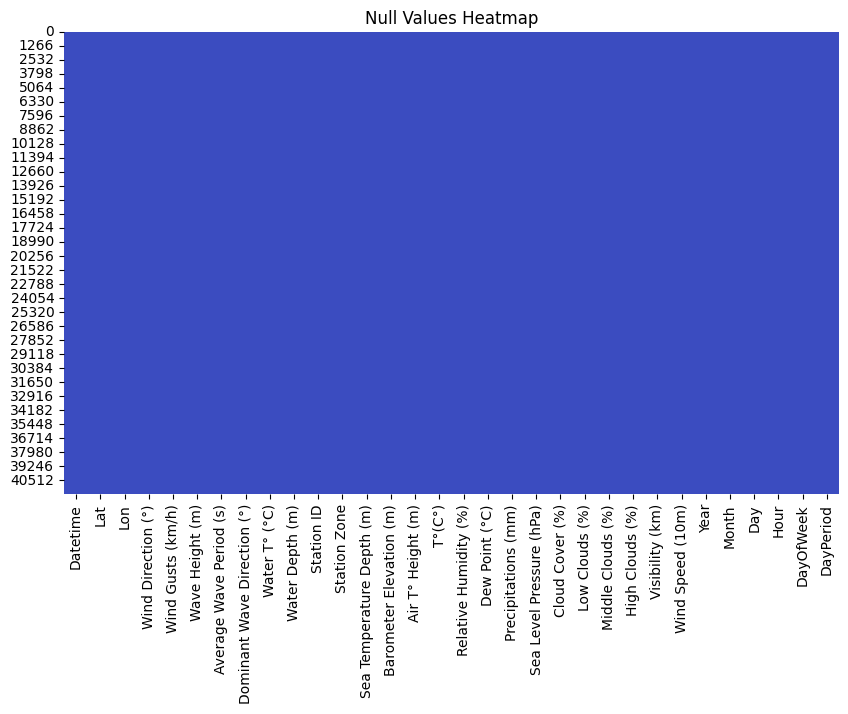

In [12]:
# null values heatmap
plt.figure(figsize=(10, 6))

sns.heatmap(df_EDA.isnull(), cbar=False, cmap='coolwarm')

plt.title('Null Values Heatmap')

plt.show()

In [13]:
# Chercher les colonnes numériques et catégorielles
numerical_columns = df_EDA.select_dtypes(include=[np.number]).columns
categorical_columns = df_EDA.select_dtypes(include=[object]).columns

print(f"\nNumerical Columns:\n{numerical_columns}")
print(f"\nCategorical Columns:\n{categorical_columns}")


Numerical Columns:
Index(['Lat', 'Lon', 'Wind Direction (°)', 'Wind Gusts (km/h)',
       'Wave Height (m)', 'Average Wave Period (s)',
       'Dominant Wave Direction (°)', 'Water T° (°C)', 'Water Depth (m)',
       'Station ID', 'T°(C°)', 'Relative Humidity (%)', 'Dew Point (°C)',
       'Precipitations (mm)', 'Sea Level Pressure (hPa)', 'Cloud Cover (%)',
       'Low Clouds (%)', 'Middle Clouds (%)', 'High Clouds (%)',
       'Visibility (km)', 'Wind Speed (10m)', 'Year', 'Day', 'Hour'],
      dtype='object')

Categorical Columns:
Index(['Datetime', 'Station Zone', 'Sea Temperature Depth (m)',
       'Barometer Elevation (m)', 'Air T° Height (m)', 'Month', 'DayOfWeek',
       'DayPeriod'],
      dtype='object')


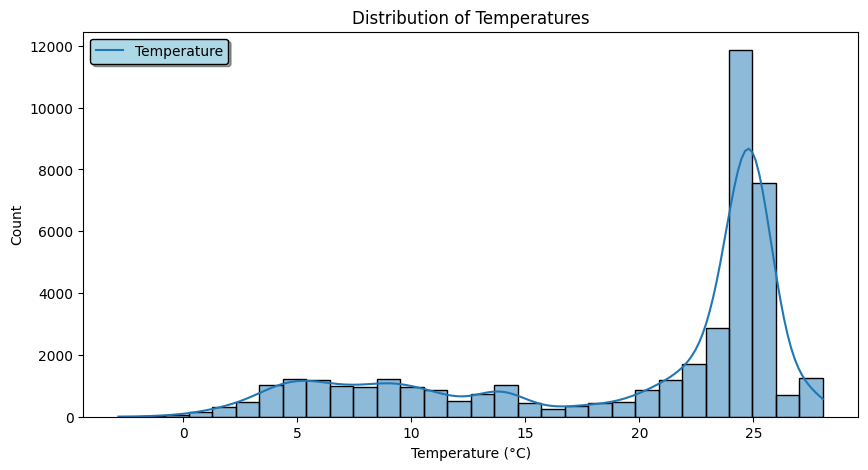

In [14]:
# analyse de la distribution des températures
plt.figure(figsize=(10, 5))

sns.histplot(df_EDA['T°(C°)'], kde=True, bins=30)

plt.title("Distribution of Temperatures")
plt.xlabel("Temperature (°C)")
plt.ylabel("Count")
plt.legend(
    labels=['Temperature'],
    loc='best',
    shadow=True,
    facecolor='lightblue',
    edgecolor='black'    
)

plt.show()

Text(0.5, 1.0, 'Distribution of Wind Speeds')

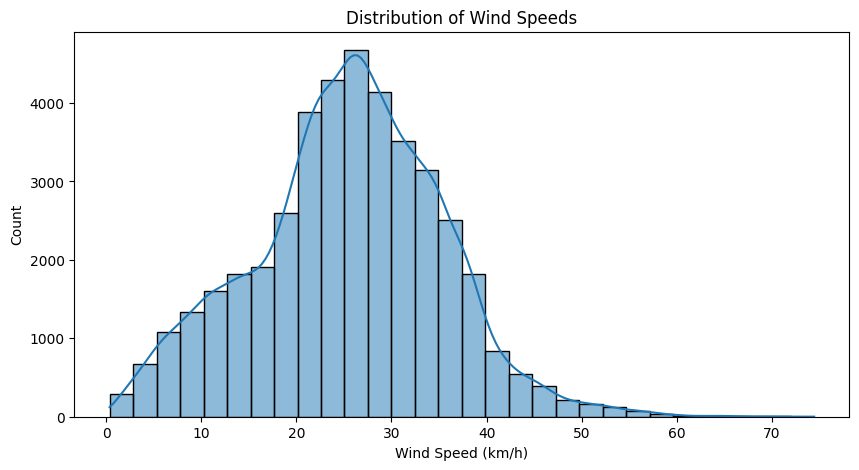

In [15]:
#analyse de la distribution de la vitesse du vent
plt.figure(figsize=(10, 5))

sns.histplot(df_EDA['Wind Speed (10m)'], kde=True, bins=30)
plt.xlabel("Wind Speed (km/h)")
plt.ylabel("Count")
plt.title("Distribution of Wind Speeds")

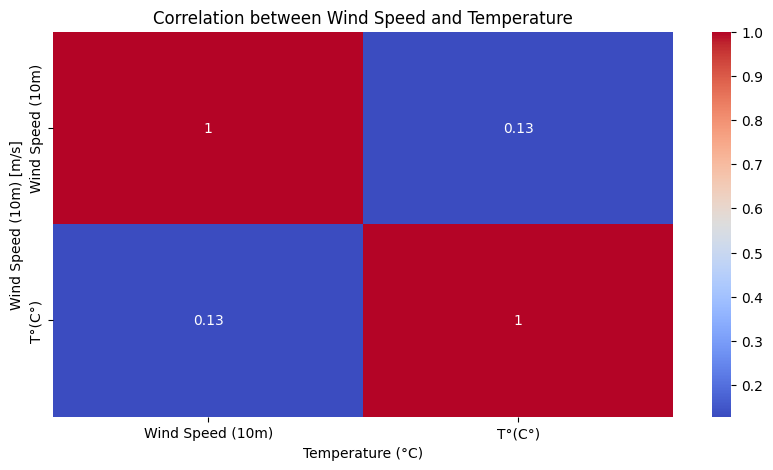

In [16]:
# Analyse de la relation entre la température et la vitesse du vent

corr_data = df_EDA[['Wind Speed (10m)', 'T°(C°)']].corr()

# Création de la heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', cbar=True)

# Ajouter les labels aux axes
plt.xlabel("Temperature (°C)")
plt.ylabel("Wind Speed (10m) [m/s]")
plt.title("Correlation between Wind Speed and Temperature")

# Afficher le graphique
plt.show()

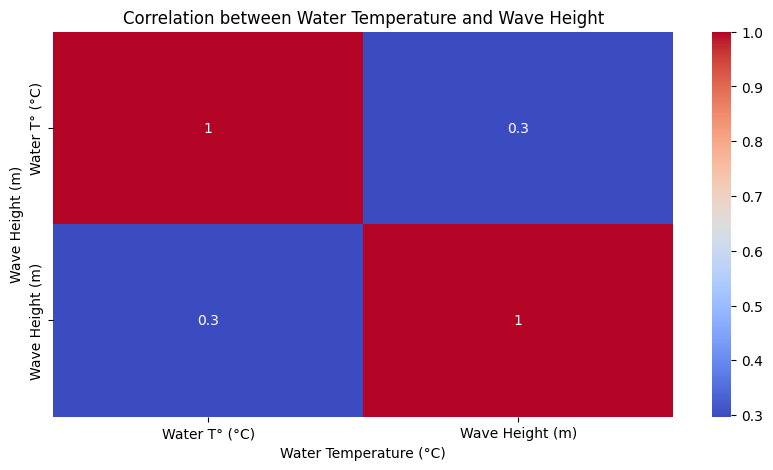

In [17]:
# Corrélation T° eau et hauteur des vagues
corr_data = df_EDA[['Water T° (°C)', 'Wave Height (m)']].corr()

# Création de la heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', cbar=True)

# Ajouter les labels aux axes
plt.xlabel("Water Temperature (°C)")
plt.ylabel("Wave Height (m)")
plt.title("Correlation between Water Temperature and Wave Height")

# Afficher le graphique
plt.show()

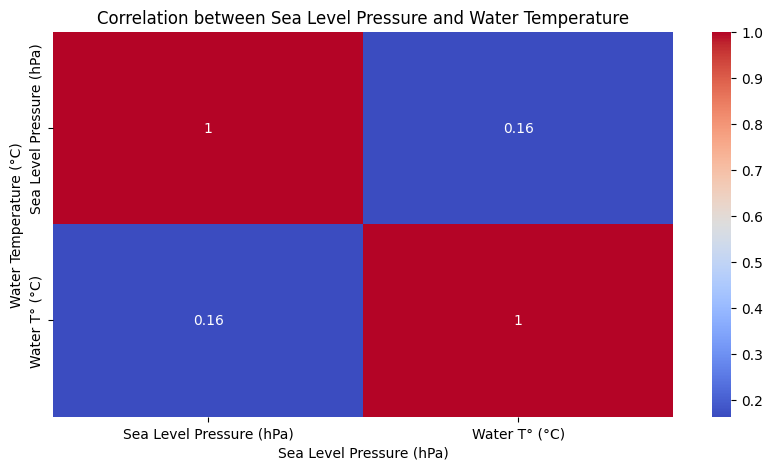

In [18]:
# correlation entre la pression MSL et la température de l'eau

corr_data = df_EDA[['Sea Level Pressure (hPa)', 'Water T° (°C)']].corr()

# Création de la heatmap

plt.figure(figsize=(10, 5))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', cbar=True)

# Ajouter les labels aux axes

plt.xlabel("Sea Level Pressure (hPa)")
plt.ylabel("Water Temperature (°C)")
plt.title("Correlation between Sea Level Pressure and Water Temperature")

# Afficher le graphique

plt.show()

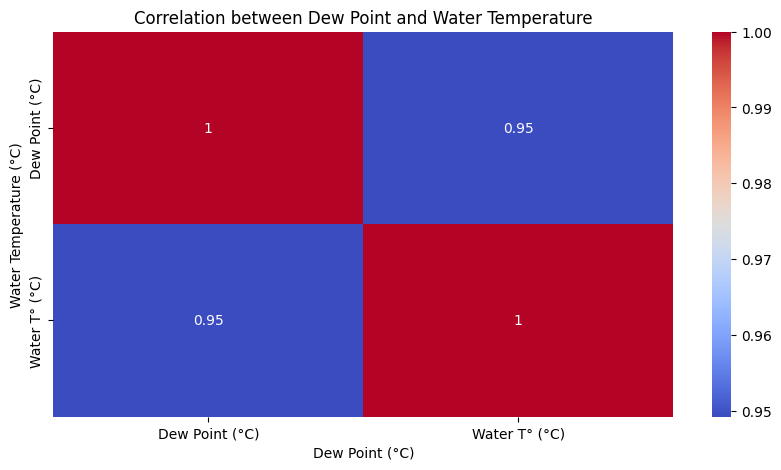

In [19]:
# correlation between Dew Point (°C) and water Temperature (°C)

corr_data = df_EDA[['Dew Point (°C)', 'Water T° (°C)']].corr()

# Création de la heatmap

plt.figure(figsize=(10, 5))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', cbar=True)

# Ajouter les labels aux axes

plt.xlabel("Dew Point (°C)")
plt.ylabel("Water Temperature (°C)")
plt.title("Correlation between Dew Point and Water Temperature")

# Afficher le graphique

plt.show()


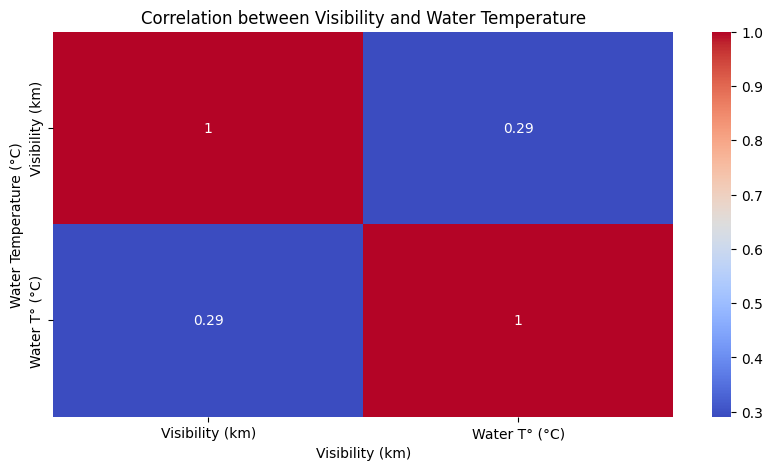

In [20]:
# correlation entre visibilité et la température de l'eau

corr_data = df_EDA[['Visibility (km)', 'Water T° (°C)']].corr()

# Création de la heatmap

plt.figure(figsize=(10, 5))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', cbar=True)

# Ajouter les labels aux axes

plt.xlabel("Visibility (km)")
plt.ylabel("Water Temperature (°C)")
plt.title("Correlation between Visibility and Water Temperature")

# Afficher le graphique

plt.show()

In [21]:
#revoir les colonnes numériques
df_numerical_columns = df_EDA.select_dtypes(include=[np.number]).columns

print(df_numerical_columns)

Index(['Lat', 'Lon', 'Wind Direction (°)', 'Wind Gusts (km/h)',
       'Wave Height (m)', 'Average Wave Period (s)',
       'Dominant Wave Direction (°)', 'Water T° (°C)', 'Water Depth (m)',
       'Station ID', 'T°(C°)', 'Relative Humidity (%)', 'Dew Point (°C)',
       'Precipitations (mm)', 'Sea Level Pressure (hPa)', 'Cloud Cover (%)',
       'Low Clouds (%)', 'Middle Clouds (%)', 'High Clouds (%)',
       'Visibility (km)', 'Wind Speed (10m)', 'Year', 'Day', 'Hour'],
      dtype='object')


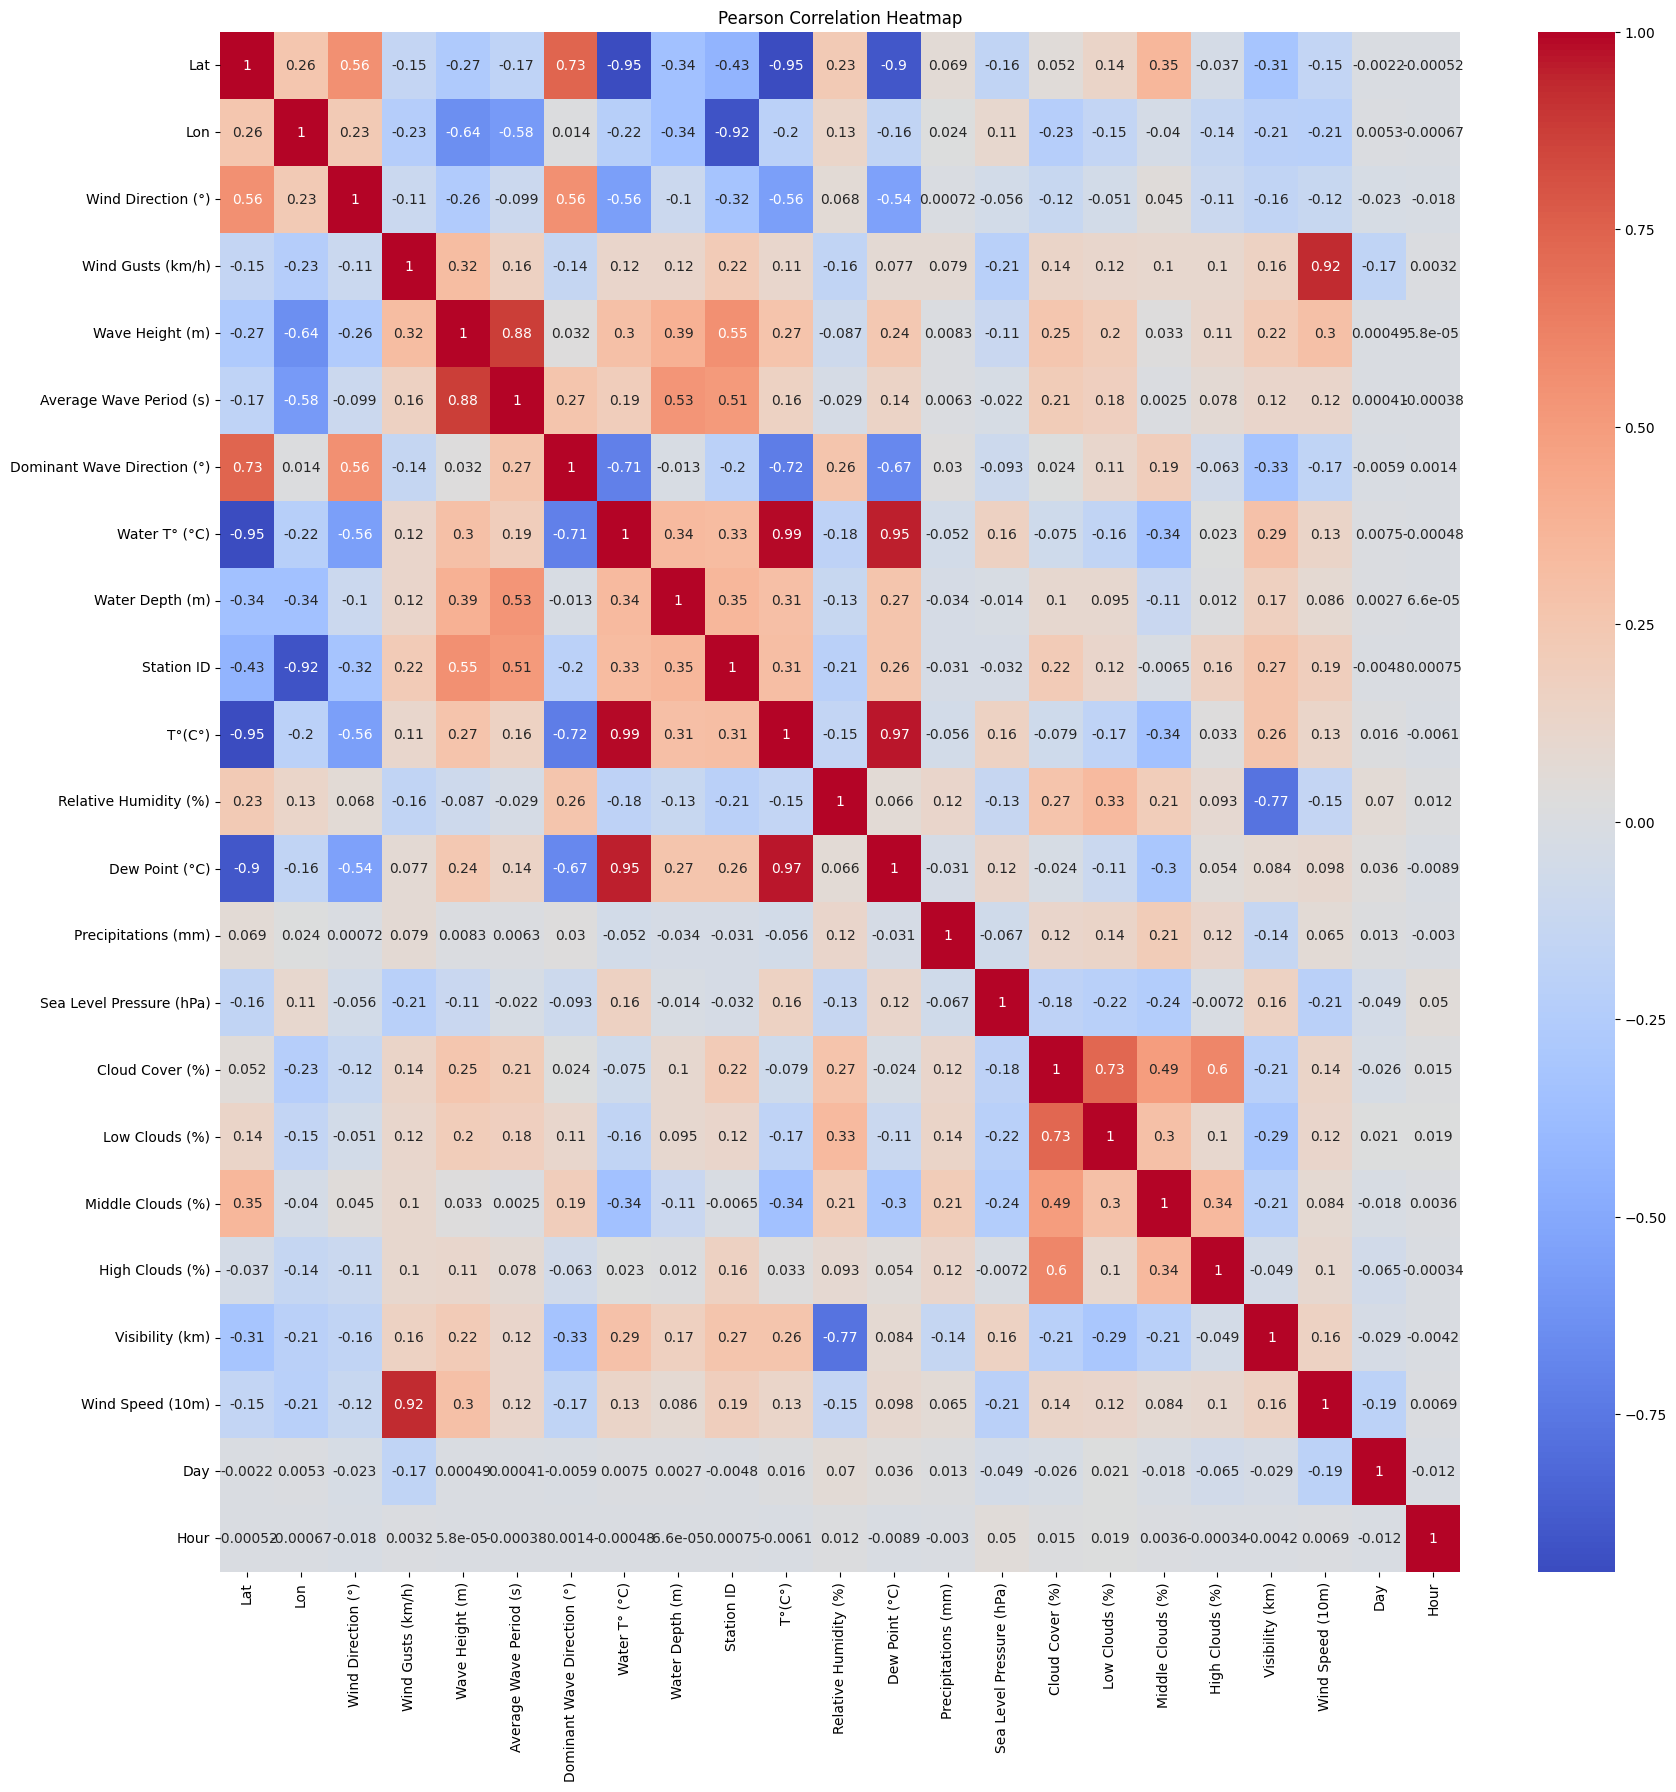

In [22]:
plt.figure(figsize=(20, 20))
df_numerical_columns = df_EDA.select_dtypes(include=[np.number]).columns
# KICK the year column

df_numerical_columns = df_numerical_columns[df_numerical_columns != 'Year']

corr_data = df_EDA[df_numerical_columns].corr(method='pearson')

sns.heatmap(corr_data, annot=True, cmap='coolwarm', cbar=True)

plt.title("Pearson Correlation Heatmap")
plt.show()


In [24]:
# voir les colonnes numeriques

df_EDA.select_dtypes(include=[np.number]).columns

Index(['Lat', 'Lon', 'Wind Direction (°)', 'Wind Gusts (km/h)',
       'Wave Height (m)', 'Average Wave Period (s)',
       'Dominant Wave Direction (°)', 'Water T° (°C)', 'Water Depth (m)',
       'Station ID', 'T°(C°)', 'Relative Humidity (%)', 'Dew Point (°C)',
       'Precipitations (mm)', 'Sea Level Pressure (hPa)', 'Cloud Cover (%)',
       'Low Clouds (%)', 'Middle Clouds (%)', 'High Clouds (%)',
       'Visibility (km)', 'Wind Speed (10m)', 'Year', 'Day', 'Hour'],
      dtype='object')

In [25]:
# voir les colonnes categoriques

df_EDA.select_dtypes(exclude=['float32', 'float64', 'int32', 'int64']).columns

Index(['Datetime', 'Station Zone', 'Sea Temperature Depth (m)',
       'Barometer Elevation (m)', 'Air T° Height (m)', 'Month', 'DayOfWeek',
       'DayPeriod'],
      dtype='object')

In [26]:
display_row_values(df_EDA)

Index  |  Datetime             |  Lat    |  Lon      |  Wind Direction (°)  |  Wind Gusts (km/h)  |  Wave Height (m)  |  Average Wave Period (s)  |  Dominant Wave Direction (°)  |  Water T° (°C)  |  Water Depth (m)  |  Station ID  |  Station Zone                              |  Sea Temperature Depth (m)  |  Barometer Elevation (m)  |  Air T° Height (m)  |  T°(C°)  |  Relative Humidity (%)  |  Dew Point (°C)  |  Precipitations (mm)  |  Sea Level Pressure (hPa)  |  Cloud Cover (%)  |  Low Clouds (%)  |  Middle Clouds (%)  |  High Clouds (%)  |  Visibility (km)     |  Wind Speed (10m)    |  Year  |  Month  |  Day  |  Hour  |  DayOfWeek  |  DayPeriod
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [28]:
df_EDA.dtypes

Datetime                        object
Lat                            float64
Lon                            float64
Wind Direction (°)             float64
Wind Gusts (km/h)              float64
Wave Height (m)                float64
Average Wave Period (s)        float64
Dominant Wave Direction (°)    float64
Water T° (°C)                  float64
Water Depth (m)                float64
Station ID                       int64
Station Zone                    object
Sea Temperature Depth (m)       object
Barometer Elevation (m)         object
Air T° Height (m)               object
T°(C°)                         float64
Relative Humidity (%)          float64
Dew Point (°C)                 float64
Precipitations (mm)            float64
Sea Level Pressure (hPa)       float64
Cloud Cover (%)                float64
Low Clouds (%)                 float64
Middle Clouds (%)              float64
High Clouds (%)                float64
Visibility (km)                float64
Wind Speed (10m)         

In [36]:
# Convertir la colonne 'Datetime' en datetime
df_EDA['Datetime'] = pd.to_datetime(df_EDA['Datetime'])

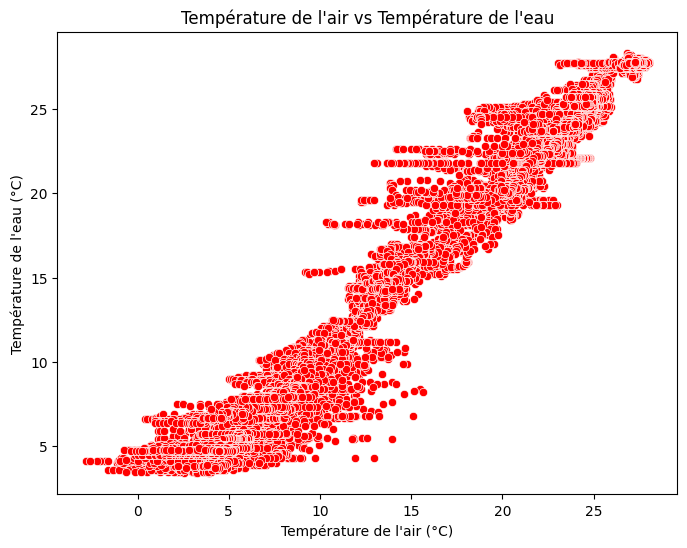

In [38]:
# 2. Température de l'air vs Température de l'eau
plt.figure(figsize=(8, 6))
sns.scatterplot(x='T°(C°)', y='Water T° (°C)', data=df_EDA, color='r')
plt.title('Température de l\'air vs Température de l\'eau')
plt.xlabel('Température de l\'air (°C)')
plt.ylabel('Température de l\'eau (°C)')
plt.show()

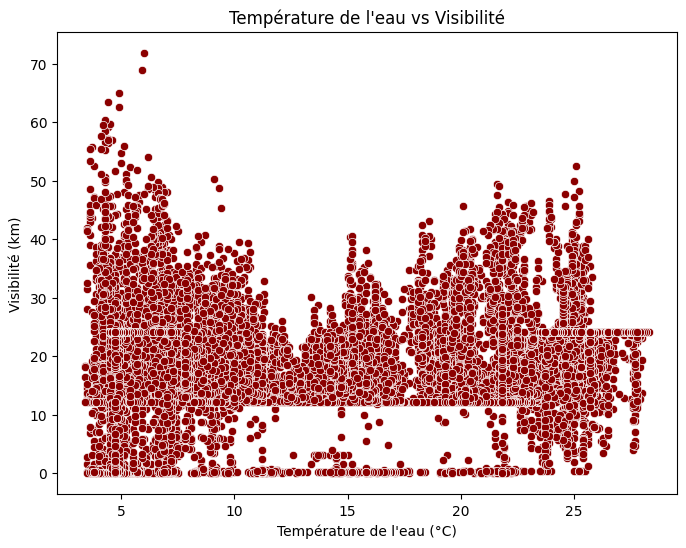

In [44]:
# 6. Température de l'eau vs Visibilité
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Water T° (°C)', y='Visibility (km)', data=df_EDA, color='darkred')
plt.title('Température de l\'eau vs Visibilité')
plt.xlabel('Température de l\'eau (°C)')
plt.ylabel('Visibilité (km)')
plt.show()


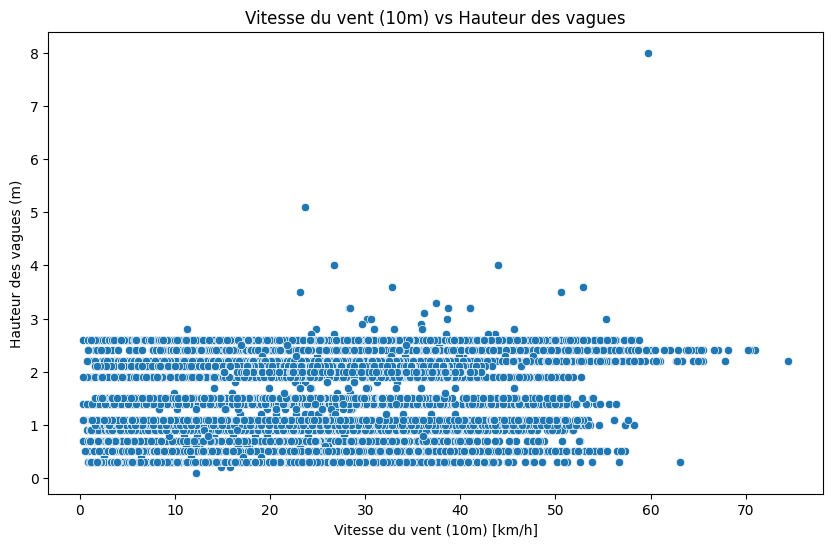

In [47]:
# 1. Vitesse du vent (10m) vs Hauteur des vagues
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Wind Speed (10m)', y='Wave Height (m)', data=df_EDA)
plt.title('Vitesse du vent (10m) vs Hauteur des vagues')
plt.xlabel('Vitesse du vent (10m) [km/h]')
plt.ylabel('Hauteur des vagues (m)')
plt.show()

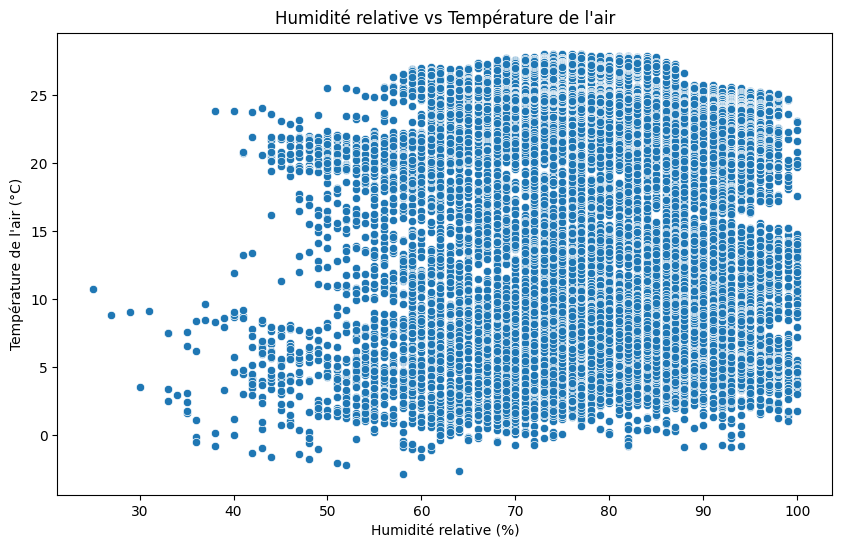

In [50]:
# 6. Humidité relative vs Température de l’air
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Relative Humidity (%)', y='T°(C°)', data=df_EDA)
plt.title('Humidité relative vs Température de l\'air')
plt.xlabel('Humidité relative (%)')
plt.ylabel('Température de l\'air (°C)')
plt.show()